In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base_path = "/home/jinjinjara1022/"

weather_forecast_data_1 = pd.read_csv(base_path + "OBIC/data/기상예측데이터_1.csv")
weather_forecast_data_2 = pd.read_csv(base_path + "OBIC/data/기상예측데이터_2.csv")  

weather_observed_data_1 = pd.read_csv(base_path + "OBIC/data/기상실측데이터_1.csv")
weather_observed_data_2 = pd.read_csv(base_path + "OBIC/data/기상실측데이터_2.csv")  
  
jeju_power_market_day_ahead = pd.read_csv(base_path + "OBIC/data/제주전력시장_시장전기가격_하루전가격.csv")
jeju_power_market_real_time = pd.read_csv(base_path + "OBIC/data/제주전력시장_시장전기가격_실시간가격.csv")

jeju_power_market_status = pd.read_csv(base_path + "OBIC/data/제주전력시장_현황데이터.csv")

In [4]:
jeju_power_market_day_ahead

,ts,하루전가격(원/kWh)
0,1709218800,107.39
1,1709222400,107.39
2,1709226000,95.30
3,1709229600,87.89
4,1709233200,0.00
...,...,...
5660,1729594800,156.68
5661,1729598400,152.54
5662,1729602000,106.92
5663,1729605600,150.97


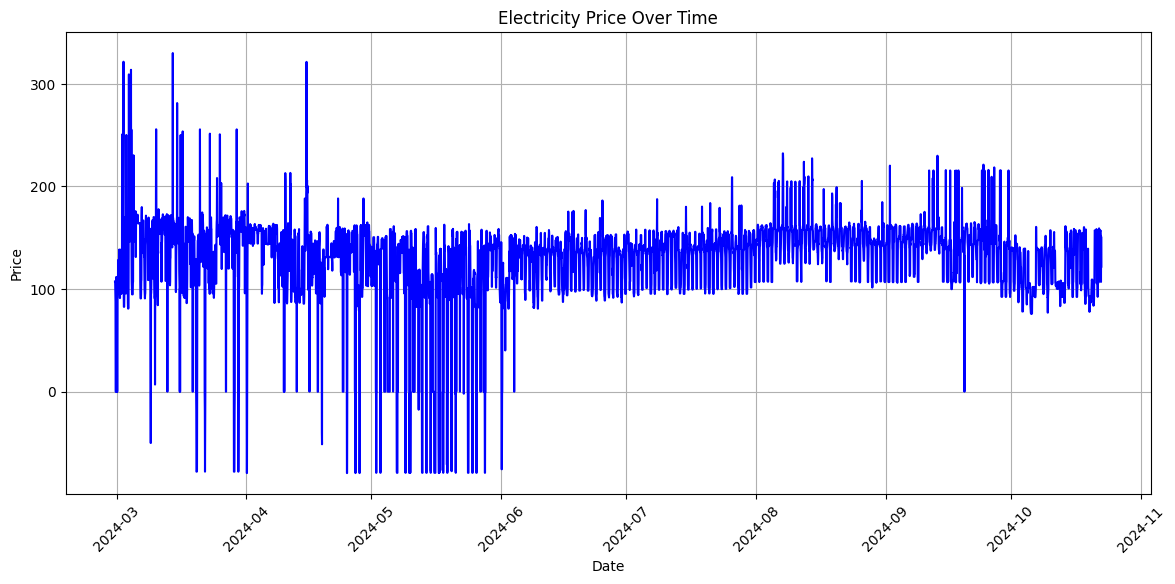

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# jeju_power_market_day_ahead 데이터프레임 가정
df = jeju_power_market_day_ahead

# 타임스탬프를 날짜로 변환
df['date'] = pd.to_datetime(df['ts'], unit='s')

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['하루전가격(원/kWh)'], linestyle='-', color='b')

# X축 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Electricity Price Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

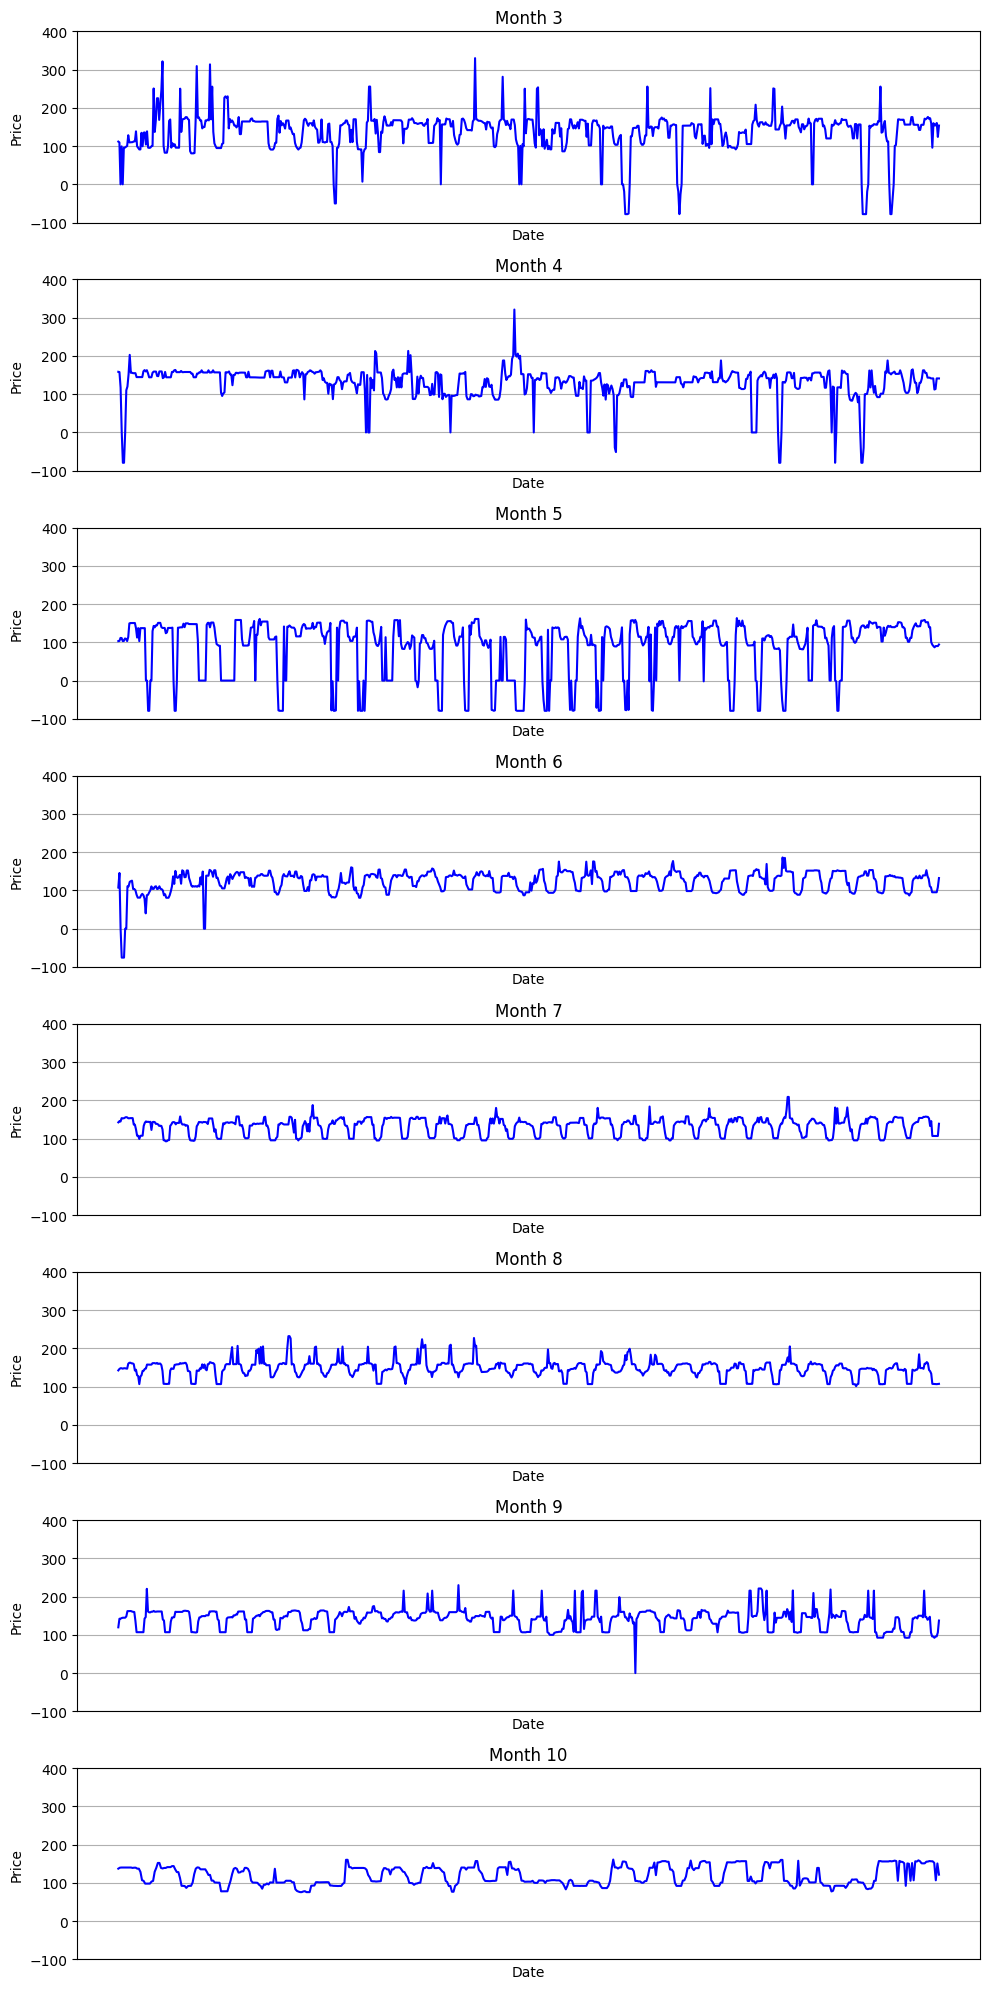

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# jeju_power_market_day_ahead 데이터프레임 가정
df = jeju_power_market_day_ahead

# 타임스탬프를 날짜로 변환
df['date'] = pd.to_datetime(df['ts'], unit='s')

# 월별로 데이터 그룹화
df['month'] = df['date'].dt.month

# 존재하는 월만 추출
months = df['month'].unique()
months.sort()  # 월을 정렬

# 그래프 그리기
plt.figure(figsize=(10, 20))

# 3행 3열의 서브플롯 설정
num_rows = 8
num_cols = 1

for idx, month in enumerate(months):
    if idx == 0: continue
    monthly_data = df[df['month'] == month]
    plt.subplot(num_rows, num_cols, idx)  # 서브플롯 인덱스 조정
    plt.plot(monthly_data['date'], monthly_data['하루전가격(원/kWh)'], linestyle='-', color='b')
    
    # X축 설정
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title(f'Month {month}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks([])
    plt.ylim(-100, 400)
    plt.grid()

plt.tight_layout()
plt.show()

In [7]:
df2 = jeju_power_market_real_time
df2 = pd.merge(df, df2, on='ts', how='right')

In [8]:
df2

,ts,하루전가격(원/kWh),date,month,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,1709218800,107.39,2024-02-29 15:00:00,2,95.30,95.30
1,1709222400,107.39,2024-02-29 16:00:00,2,107.39,107.39
2,1709226000,95.30,2024-02-29 17:00:00,2,95.30,95.30
3,1709229600,87.89,2024-02-29 18:00:00,2,87.89,87.89
4,1709233200,0.00,2024-02-29 19:00:00,2,86.50,86.50
...,...,...,...,...,...,...
5612,1729508400,158.38,2024-10-21 11:00:00,10,156.43,155.32
5613,1729512000,157.18,2024-10-21 12:00:00,10,156.35,155.32
5614,1729515600,105.63,2024-10-21 13:00:00,10,155.89,154.80
5615,1729519200,157.56,2024-10-21 14:00:00,10,155.23,154.89


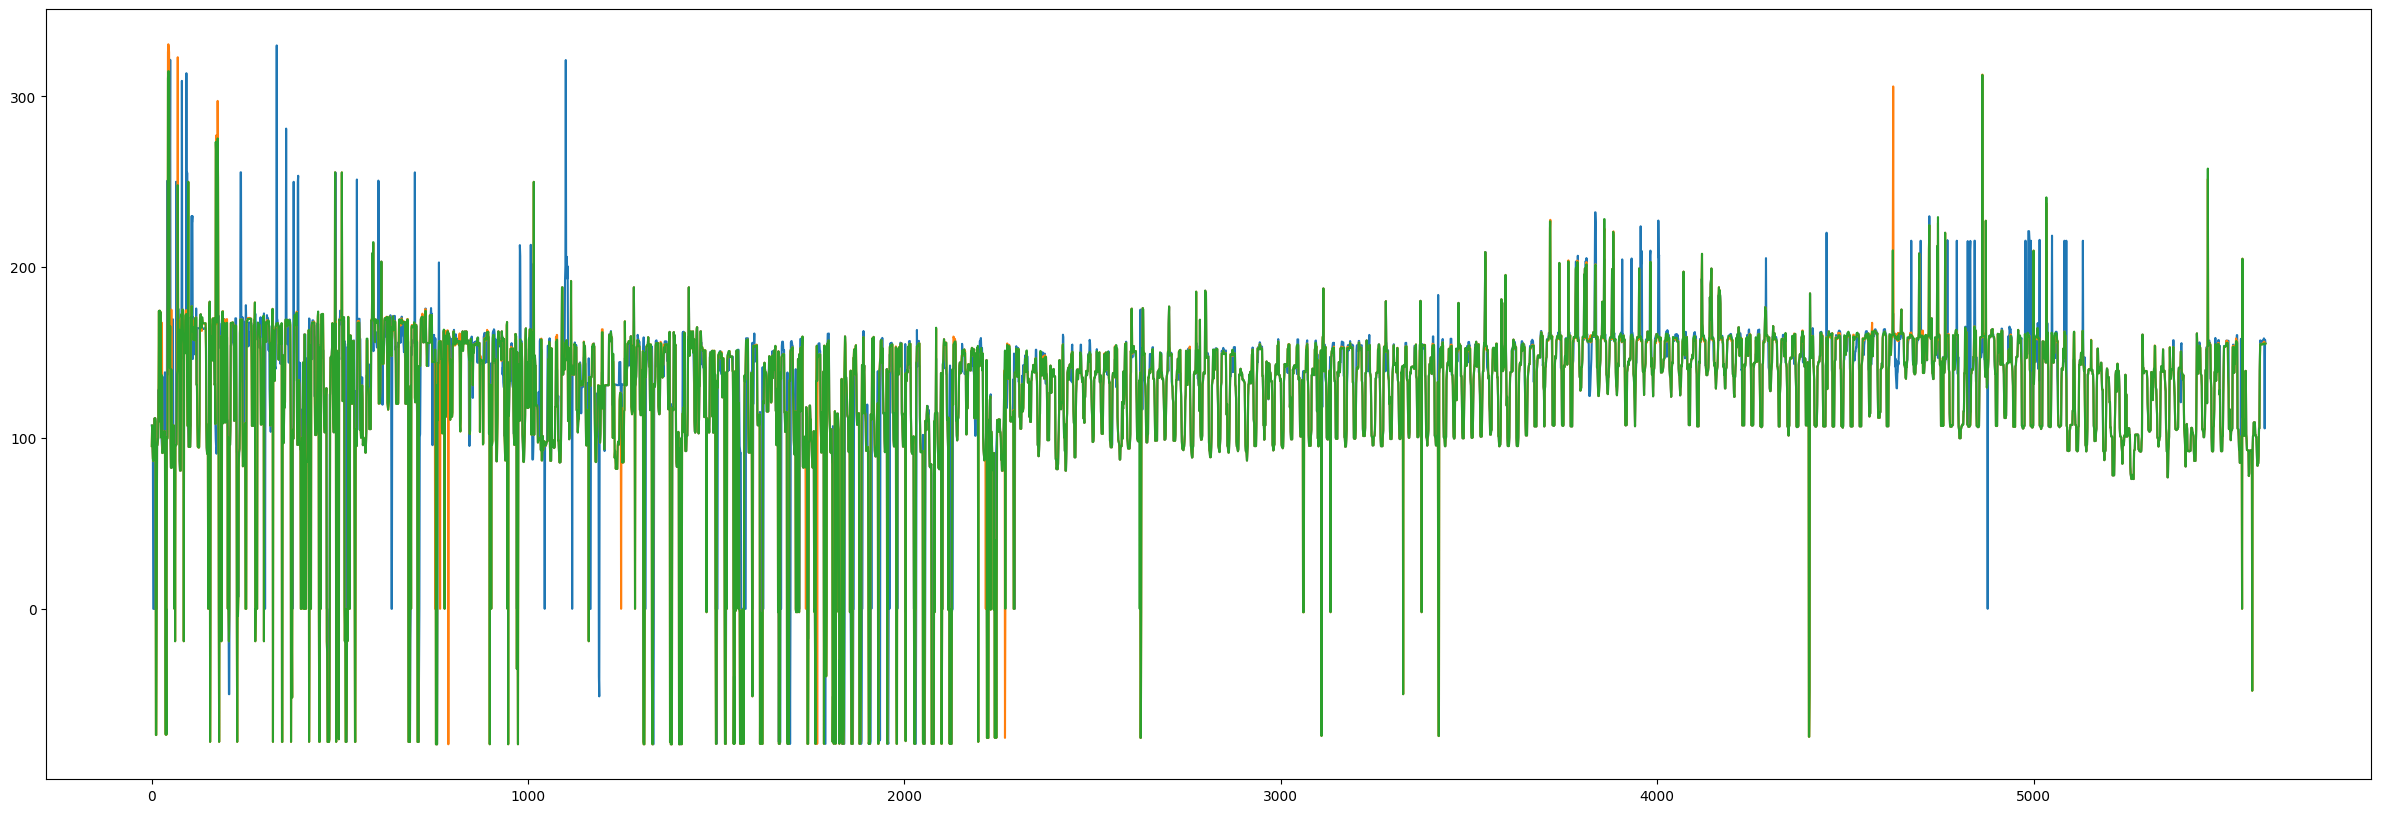

In [9]:
plt.figure(figsize=(30, 10))

plt.plot(df2['하루전가격(원/kWh)'])
plt.plot(df2['실시간 임시 가격(원/kWh)'])
plt.plot(df2['실시간 확정 가격(원/kWh)'])
plt.show()

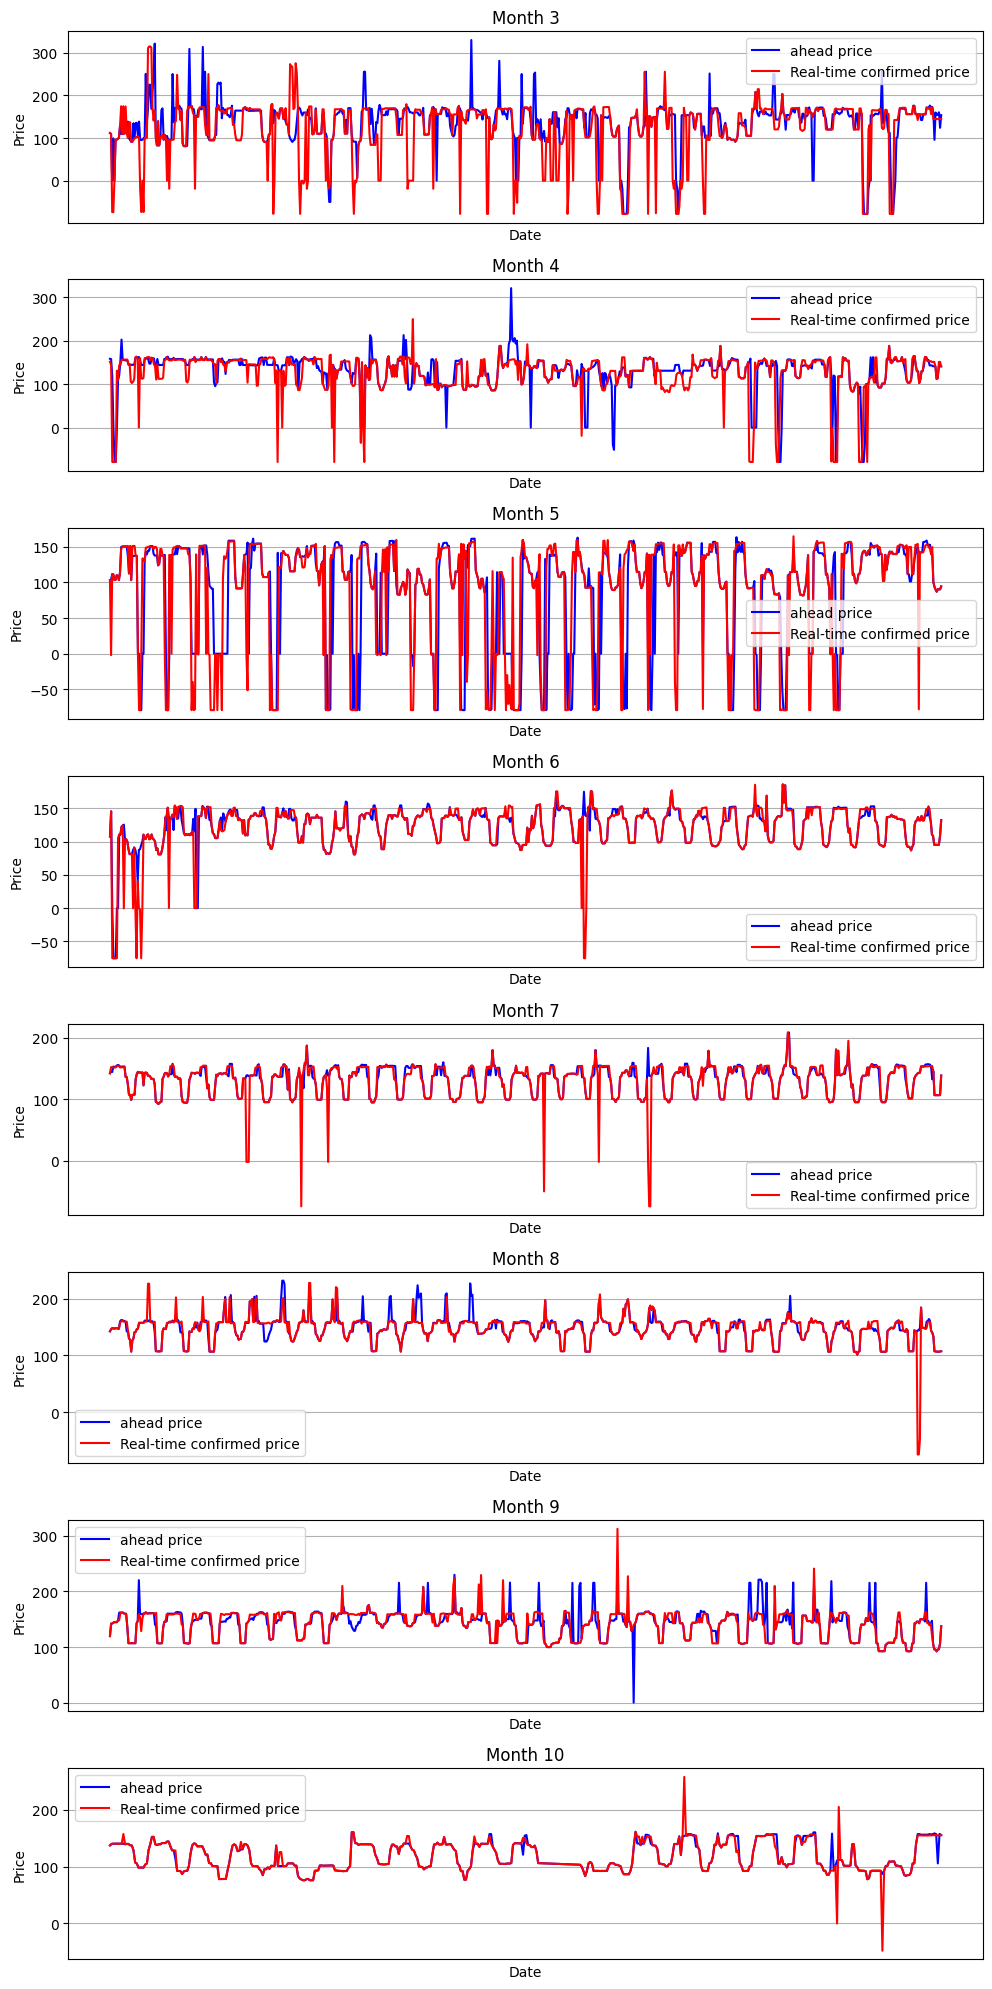

In [9]:
# 존재하는 월만 추출
months = df2['month'].unique()
months.sort()  # 월을 정렬

# 그래프 그리기
plt.figure(figsize=(10, 20))

# 3행 3열의 서브플롯 설정
num_rows = 8
num_cols = 1

for idx, month in enumerate(months):
    if idx==0: continue
    monthly_data = df2[df2['month'] == month]
    plt.subplot(num_rows, num_cols, idx)  # 서브플롯 인덱스 조정
    
    plt.plot(monthly_data['date'], monthly_data['하루전가격(원/kWh)'], label='ahead price', color='b')
    #plt.plot(monthly_data['date'], monthly_data['실시간 임시 가격(원/kWh)'], label='real-time tmp price', color='g')
    plt.plot(monthly_data['date'], monthly_data['실시간 확정 가격(원/kWh)'], label='Real-time confirmed price', color='r')

    # X축 설정
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title(f'Month {month}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks([])
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

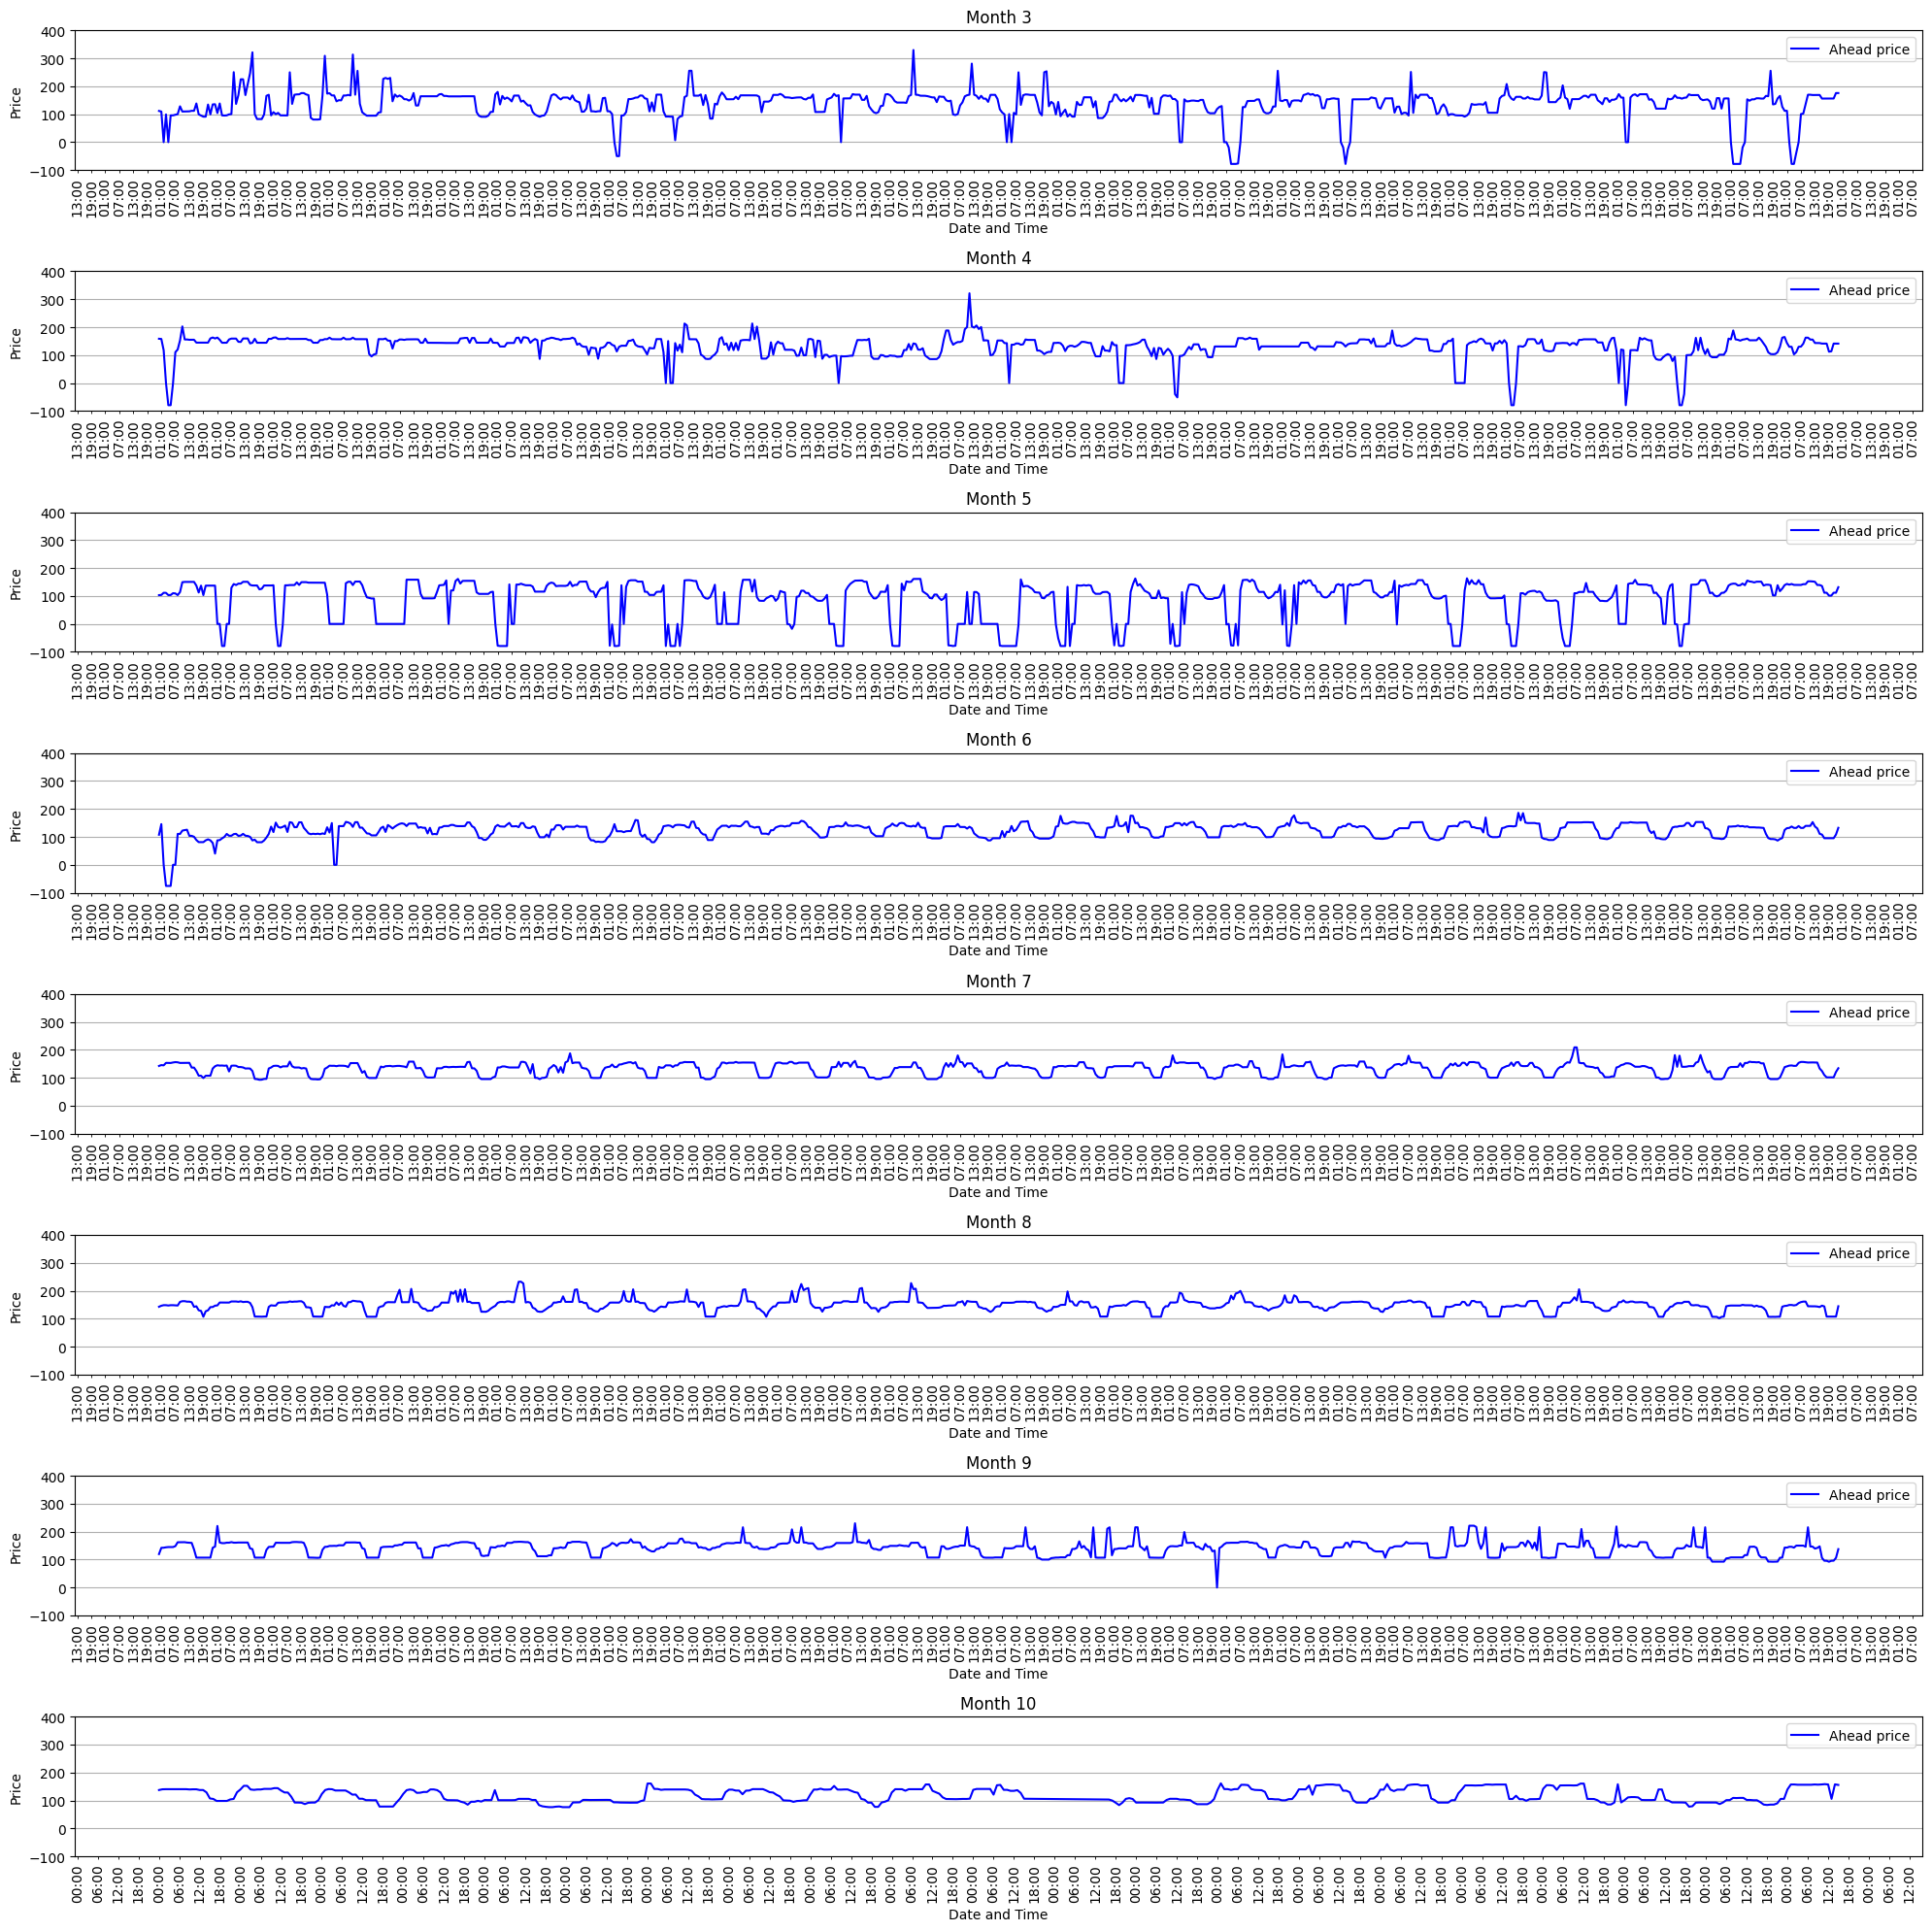

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 존재하는 월만 추출
months = df2['month'].unique()
months.sort()  # 월을 정렬

# 그래프 그리기
plt.figure(figsize=(20, 20))

# 서브플롯 설정
num_rows = 8
num_cols = 1

for idx, month in enumerate(months):
    if idx == 0: continue
    monthly_data = df2[df2['month'] == month].head(24 * 30)  # 각 월의 첫 7일 데이터만 사용
    plt.subplot(num_rows, num_cols, idx)  # 서브플롯 인덱스 조정
    
    plt.plot(monthly_data['date'], monthly_data['하루전가격(원/kWh)'], label='Ahead price', color='b')
    # plt.plot(monthly_data['date'], monthly_data['실시간 임시 가격(원/kWh)'], label='Real-time temp price', color='g')
    # plt.plot(monthly_data['date'], monthly_data['실시간 확정 가격(원/kWh)'], label='Real-time confirmed price', color='r')

    # X축 설정
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())   # 하루 단위 표시
    plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # 6시간 간격으로 표시
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # 시간 표시 추가

    plt.title(f'Month {month}')
    plt.xlabel('Date and Time')
    plt.ylabel('Price')
    # plt.xticks(rotation=45)
    plt.xticks([])
    plt.ylim(-100, 400)

    plt.tick_params(axis='x', which='minor', rotation=90)  # 시간은 90도 회전

    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()
